# Two-Group Experiments

> Explanation of how to use dabest for two-group and multi two-group analysis.

- order: 2

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 67.58it/s]

Numba compilation complete!
We're using DABEST v2024.03.30


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Creating a demo dataset

Here, we create a dataset to illustrate how to perform Two-Group analyses using dabest.

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2,
                 'Control 3' : c3,     'Test 3' : t3,
                 'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                 'Gender'    : gender, 'ID'  : id_col
                })
df.head(5)

,Control 1,Test 1,Control 2,Test 2,Control 3,Test 3,Test 4,Test 5,Test 6,Gender,ID
0,2.793984,3.420875,3.324661,1.707467,3.816940,1.796581,4.440050,2.937284,3.486127,Female,1
1,3.236759,3.467972,3.685186,1.121846,3.750358,3.944566,3.723494,2.837062,2.338094,Female,2
2,3.019149,4.377179,5.616891,3.301381,2.945397,2.832188,3.214014,3.111950,3.270897,Female,3
3,2.804638,4.564780,2.773152,2.534018,3.575179,3.048267,4.968278,3.743378,3.151188,Female,4
4,2.858019,3.220058,2.550361,2.796365,3.692138,3.276575,2.662104,2.977341,2.328601,Female,5


## Loading data

First, we need to load the data and specify the relevant groups. 

We can achieve this by supplying the dataframe to `dabest.load()`. Additionally, we must provide the groups to be compared in the `idx` argument as a tuple or list.

For this tutorial, we will create two separate analyses: 
- A singular two-group comparison between Control 1 and Test 1
- A multi two-group comparison between Control 1 and Test 1, and between Control 2 and Test 2. 
  
The **multi two-group estimation plot** tiles two or more Cumming plots
horizontally, and is created by passing a *nested tuple* to ``idx`` when
``dabest.load()`` is first invoked.

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"))
multi_two_groups_unpaired = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3")))

In addition, we can specify the `paired` argument to indicate paired data.

 `paired` can be set as 'baseline' or 'sequential' or left as None (unpaired). 
 
 **Note: For two-group, both 'baseline' and 'sequential' are equivalent.**

In [ ]:
two_groups_paired = dabest.load(df, idx=("Control 1", "Test 1"), paired='baseline', id_col='ID')
multi_two_groups_paired = dabest.load(df, idx=(("Control 1", "Test 1"),("Control 2", "Test 2"),("Control 3", "Test 3")), 
                                      paired='baseline', id_col='ID')

The **dabest** library features a range of effect sizes. In this case, we shall proceed with the default effect size, which is the mean difference.

Here we will show the two-group unpaired analysis as an example.

In [ ]:
two_groups_unpaired.mean_diff

DABEST v2024.03.30
                  
Good afternoon!
The current time is Wed Feb 12 16:57:17 2025.

The unpaired mean difference between Control 1 and Test 1 is 0.48 [95%CI 0.205, 0.774].
The p-value of the two-sided permutation t-test is 0.001, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

A dataframe of the mean_diff results can be extracted by calling the `results` attribute of the `dabest.mean_diff` object.

In [ ]:
two_groups_unpaired.mean_diff.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,pvalue_mann_whitney,statistic_mann_whitney,bec_difference,bec_bootstraps,bec_bca_interval_idx,bec_bca_low,bec_bca_high,bec_pct_interval_idx,bec_pct_low,bec_pct_high
0,Control 1,Test 1,20,20,mean difference,None,0.48029,95,0.205161,0.773647,...,0.001625,83.0,0.0,"[-0.09732932551566487, 0.08087009665445155, -0...","(127, 4877)",-0.256862,0.259558,"(125, 4875)",-0.25826,0.25759


## Producing estimation plots

We can now call the `.plot()` method to generate the estimation plot.

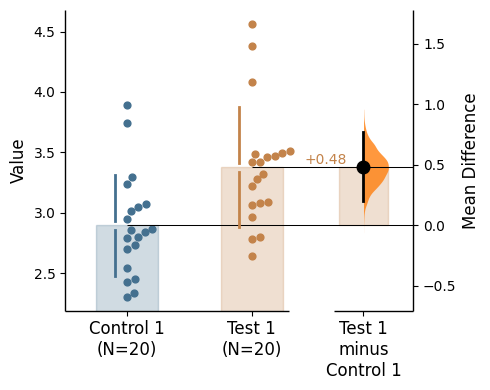

In [ ]:
two_groups_unpaired.mean_diff.plot();

For singular two-group comparisons, the plot will display the effect size curve by default to the right of the raw data.
We term this a **Gardner-Altman plot**.

This can be changed by setting the `float_contrast` argument to `False`. Here, the effect size curve will be displayed below the raw data - a **Cumming estimation plot**.


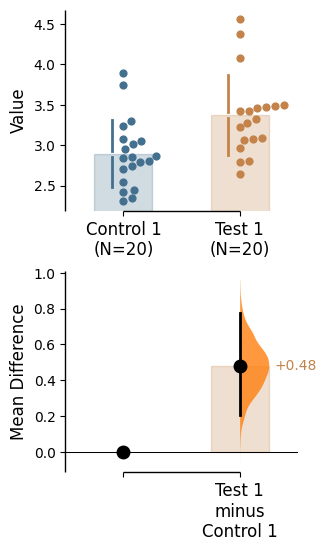

In [ ]:
two_groups_unpaired.mean_diff.plot(float_contrast=False);

For multi two-group comparisons, the effect size curves will always be displayed below the raw data.

The lower axes in the Cumming plot is effectively a [forest
plot](https://en.wikipedia.org/wiki/Forest_plot), commonly used in
meta-analyses to aggregate and to compare data from different experiments.

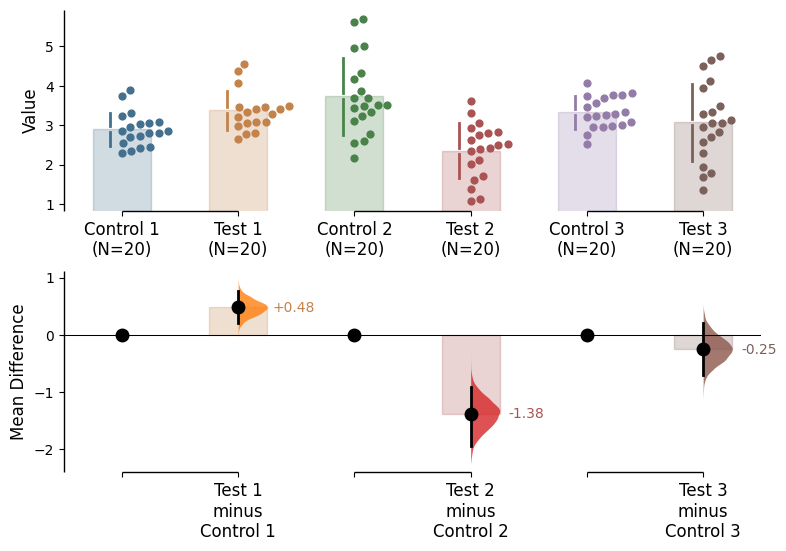

In [ ]:
multi_two_groups_unpaired.mean_diff.plot();

For paired data, we use
[slopegraphs](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0003nk>)
(another innovation from Edward Tufte) to connect paired observations.
Both Gardner-Altman and Cumming plots support this.


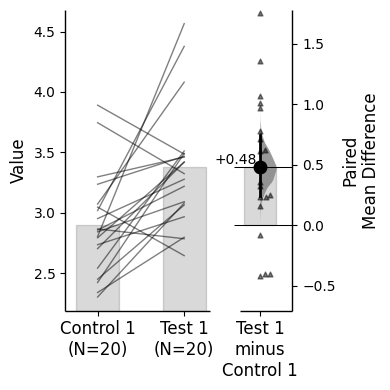

In [ ]:
two_groups_paired.mean_diff.plot();

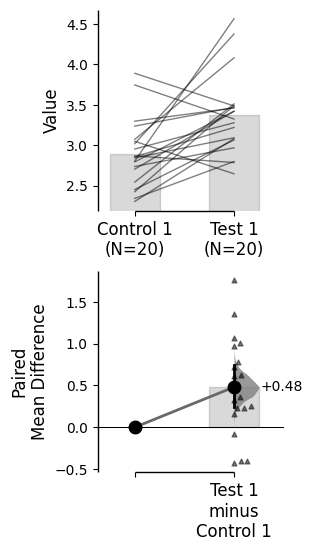

In [ ]:
two_groups_paired.mean_diff.plot(float_contrast=False);

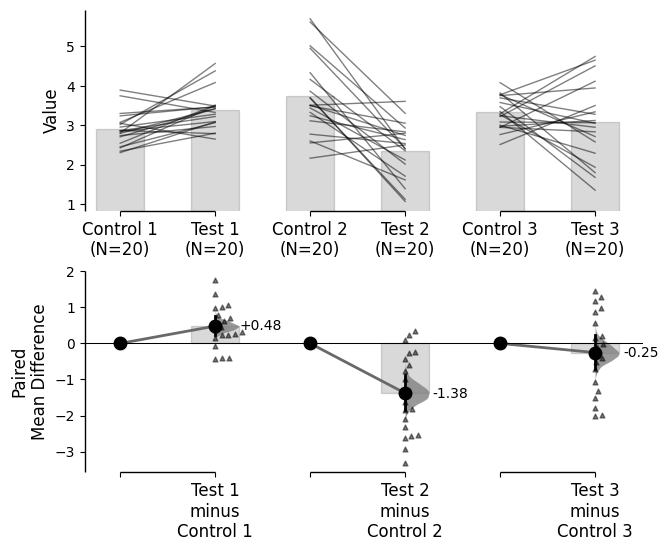

In [ ]:
multi_two_groups_paired.mean_diff.plot();

For further aesthetic changes, the '[Plot Aesthetics Tutorial](09-plot_aesthetics.html)' provides detailed examples of how to customize the plot.
